# Titanic survival - Receiever Operator Characteristic (ROC) curve


In [1]:
#Load modules
import numpy as np
import pandas as pd
# Import machine learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Load data
data = pd.read_csv('C:/t_data/processed_data.csv')
# Make all data 'float' type
data = data.astype(float)

In [3]:
# Drop Passengerid (axis=1 indicates we are removing a column rather than a row)
# We drop passenger ID as it is not original data

data.drop('PassengerId', inplace=True, axis=1)

In [4]:
#Define function to measure accuracy
def calculate_accuracy(observed, predicted):
    
    """
    Calculates a range of accuracy scores from observed and predicted classes.
    
    Takes two list or NumPy arrays (observed class values, and predicted class 
    values), and returns a dictionary of results.
    
     1) observed positive rate: proportion of observed cases that are +ve
     2) Predicted positive rate: proportion of predicted cases that are +ve
     3) observed negative rate: proportion of observed cases that are -ve
     4) Predicted negative rate: proportion of predicted cases that are -ve  
     5) accuracy: proportion of predicted results that are correct    
     6) precision: proportion of predicted +ve that are correct
     7) recall: proportion of true +ve correctly identified
     8) f1: harmonic mean of precision and recall
     9) sensitivity: Same as recall
    10) specificity: Proportion of true -ve identified:        
    11) positive likelihood: increased probability of true +ve if test +ve
    12) negative likelihood: reduced probability of true +ve if test -ve
    13) false positive rate: proportion of false +ves in true -ve patients
    14) false negative rate: proportion of false -ves in true +ve patients
    15) true positive rate: Same as recall
    16) true negative rate
    17) positive predictive value: chance of true +ve if test +ve
    18) negative predictive value: chance of true -ve if test -ve
    
    """
    
    # Converts list to NumPy arrays
    if type(observed) == list:
        observed = np.array(observed)
    if type(predicted) == list:
        predicted = np.array(predicted)
    
    # Calculate accuracy scores
    observed_positives = observed == 1
    observed_negatives = observed == 0
    predicted_positives = predicted == 1
    predicted_negatives = predicted == 0
    
    true_positives = (predicted_positives == 1) & (observed_positives == 1)
    
    false_positives = (predicted_positives == 1) & (observed_positives == 0)
    
    true_negatives = (predicted_negatives == 1) & (observed_negatives == 1)
    
    accuracy = np.mean(predicted == observed)
    
    precision = (np.sum(true_positives) /
                 (np.sum(true_positives) + np.sum(false_positives)))
        
    recall = np.sum(true_positives) / np.sum(observed_positives)
    
    sensitivity = recall
    
    f1 = 2 * ((precision * recall) / (precision + recall))
    
    specificity = np.sum(true_negatives) / np.sum(observed_negatives)
    
    positive_likelihood = sensitivity / (1 - specificity)
    
    negative_likelihood = (1 - sensitivity) / specificity
    
    false_positive_rate = 1 - specificity
    
    false_negative_rate = 1 - sensitivity
    
    true_positive_rate = sensitivity
    
    true_negative_rate = specificity
    
    positive_predictive_value = (np.sum(true_positives) / 
                                 np.sum(observed_positives))
    
    negative_predictive_value = (np.sum(true_negatives) / 
                                  np.sum(observed_positives))
    
    # Create dictionary for results, and add results
    results = dict()
    
    results['observed_positive_rate'] = np.mean(observed_positives)
    results['observed_negative_rate'] = np.mean(observed_negatives)
    results['predicted_positive_rate'] = np.mean(predicted_positives)
    results['predicted_negative_rate'] = np.mean(predicted_negatives)
    results['accuracy'] = accuracy
    results['precision'] = precision
    results['recall'] = recall
    results['f1'] = f1
    results['sensitivity'] = sensitivity
    results['specificity'] = specificity
    results['positive_likelihood'] = positive_likelihood
    results['negative_likelihood'] = negative_likelihood
    results['false_positive_rate'] = false_positive_rate
    results['false_negative_rate'] = false_negative_rate
    results['true_positive_rate'] = true_positive_rate
    results['true_negative_rate'] = true_negative_rate
    results['positive_predictive_value'] = positive_predictive_value
    results['negative_predictive_value'] = negative_predictive_value
    
    return results

In [5]:
#Divide into X (features) and y (labels)
X = data.drop('Survived',axis=1) # X = all 'data' except the 'survived' column
y = data['Survived'] # y = 'survived' column from 'data'

In [8]:
#Divide into training and tets sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [9]:
#Standardise data
def standardise_data(X_train, X_test):
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

In [10]:
X_train_std, X_test_std = standardise_data(X_train, X_test)

In [11]:
#Fit logistic regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#Receiver operating characteristic (ROC) Curve

# Get probability of non-survive and survive
probabilities = model.predict_proba(X_test_std)
# Take just the survival probabilities (column 1)
probability_survival = probabilities[:,1]

# Set up list for accuracy measures
curve_fpr = [] # flase positive rate
curve_tpr = [] # true positive rate

# Loop through increments in probability of survival
thresholds = np.arange(0, 1.01, 0.01)
for cutoff in thresholds: #  loop 0 --> 1 on steps of 0.1
    # Get whether passengers survive using cutoff
    predicted_survived = probability_survival >= cutoff
    # Call accuracy measures function
    accuracy = calculate_accuracy(y_test, predicted_survived)
    # Add accuracy scores to lists
    curve_fpr.append(accuracy['false_positive_rate'])
    curve_tpr.append(accuracy['true_positive_rate'])
    
# Note: some warning may appear, which may be ignored

C:\Users\Aabha\anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Aabha\anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Aabha\anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\Aabha\anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars


And using MatPlotLib to plot the curve:

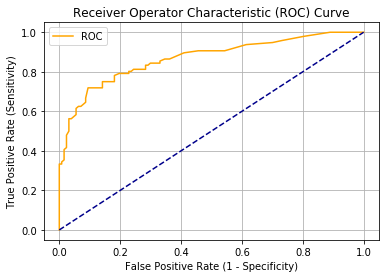

In [13]:
#And using MatPlotLib to plot the curve:

import matplotlib.pyplot as plt
%matplotlib inline

# Define a function for plotting the ROC curve
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operator Characteristic (ROC) Curve')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_roc_curve(curve_fpr, curve_tpr)

In [14]:
#Calculating area of ROC
from sklearn.metrics import auc
roc_auc = auc(curve_fpr, curve_tpr)
print ('ROC AUC: {0:0.3}'.format(roc_auc))

ROC AUC: 0.868


## Choosing threshold

Once we have decided what balance of false positive and false negative rate we want, we can look up what probability threshold to apply in order to achieve that balance. for example, if we have decided we will accept a 0.2 false positive rate, we can plot the relationship between threshold and false positive rate and read off the required threshold.

We will transfer our data to a pandas DataFrame, and then use a mask to filter data so we only see false positive rates around 0.2.

In [15]:
# Set up empty DataFrame
ROC_df = pd.DataFrame()

# Add data to DataFrame
ROC_df['threshold'] = thresholds
ROC_df['fpr'] = curve_fpr
ROC_df['tpr'] = curve_tpr

# Filter data to show false positive rates around 0.2.
mask = (ROC_df['fpr'] > 0.17) & (ROC_df['fpr'] < 0.23)
ROC_df[mask]

,threshold,fpr,tpr
35,0.35,0.228346,0.802083
36,0.36,0.228346,0.802083
37,0.37,0.228346,0.791667
38,0.38,0.228346,0.791667
39,0.39,0.220472,0.791667
40,0.40,0.196850,0.791667
41,0.41,0.181102,0.781250
42,0.42,0.181102,0.770833
43,0.43,0.181102,0.760417
44,0.44,0.181102,0.760417


From the table above you can pick the threshold to apply to classify survivors (the default threshold in `model.predict` is 0.5, but we can now use `model.predict_proba` and classify by using the desired threshold (remembering that `model.predict_proba` outputs probabilities for non-survivors (column 0) and survivors (column 1). Our new code might look something like:

In [16]:
threshold = 0.39
survived = model.predict_proba(X_test_std)[:, 1] > threshold

# Show first 5 cases
survived[0:5]

array([ True,  True,  True, False,  True])

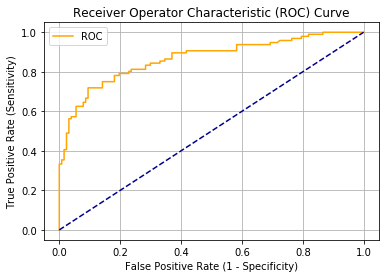

In [17]:
#Using sklearn ROC method

# Import roc_curve method
from sklearn.metrics import roc_curve

# Get probabilties from model
probabilities = model.predict_proba(X_test_std)
probabilities = probabilities[:, 1] # Probability of 'survived' class

# Get ROC curve using sklearn method
fpr, tpr, thresholds = roc_curve(y_test, probabilities) 

# Plot ROC curve
plot_roc_curve(fpr, tpr)

Note,from the above model we can see that if we pick the appropriate threshold, we can achieve a 20% false positive rate (80% specificity) and a 80% true positive rate (80% sensitivity) simultaneously.

And again we can calculate the Area Under Curve (it should be the same!)

In [18]:
roc_auc = auc(curve_fpr, curve_tpr)
print ('ROC AUC: {0:0.3}'.format(roc_auc))

ROC AUC: 0.868
